
  # Requisitos do Projeto .



# Proposta da Atividade:

Descrever o projeto , a base de dados que será utilizada e as fases de execução do projeto e a plataforma escolhida .
Descrever  como se deu o processo de extração , tratamento e transformação dos dados e os atributos a serem utilizados no modelo.
Apresentar a visualização , os resultados da execução e uma   análise  do projeto, se o modelo  Gerado possuir bom desempenho descrever como poderia ser utilizado no mundo real em interface com outros sistemas .  








In [2]:
import numpy as np 


import matplotlib.pyplot as plt


import pandas as pd 


import seaborn as sns 


import sklearn 

In [3]:

dataset = pd.read_csv('Startups.csv')

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:

dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
# Formar conjuntos  banco de dados
print('Temos no banco de dados', dataset.shape[0], 'linhas e', dataset.shape[1], 'colunas')

Temos no banco de dados 50 linhas e 5 colunas


In [11]:
# Analizando a duplicidade de dados
print('Quantidade de dados duplicados nessa base de dados foi de:', dataset.duplicated().sum())

Quantidade de dados duplicados nessa base de dados foi de: 0


In [12]:
# Verificando a quantidade de campos nulos (null)
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
# Checando os tipos de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
# Correlação entre as colunas do banco de dados
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

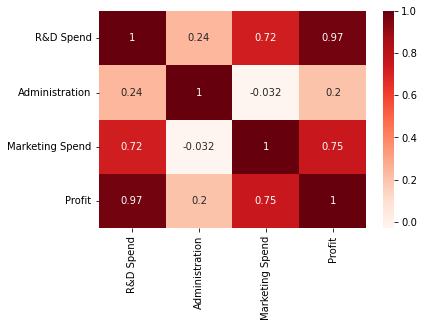

In [30]:
# Uma representação gráfica com mapa de calor
sns.heatmap(c, annot=True, cmap='Reds')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

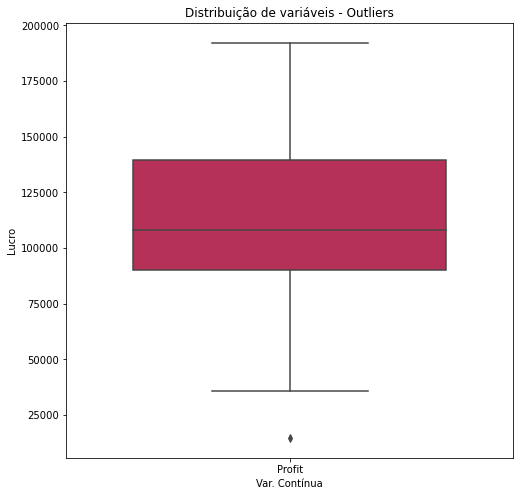

In [53]:
# Gráfico de boxplot
outliers = ['Profit']
sns.boxplot(data=dataset[outliers], orient="v", palette= "rocket", width=0.7)
plt.title("Distribuição de variáveis - Outliers")
plt.ylabel("Lucro")
plt.xlabel("Var. Contínua")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

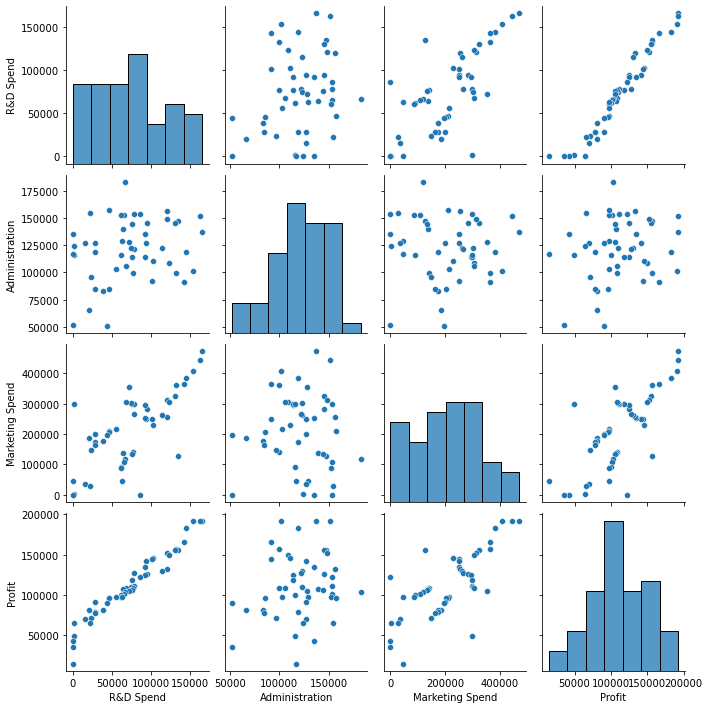

In [90]:
 sns.pairplot(dataset)
plt.show

In [67]:
# Início do pré-Processamento dos dados
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


# Mapeamento labelencoder
from sklearn.preprocessing import LabelEncoder

# Transformação Númérica
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
X1 = pd.DataFrame(x)
X1.head()


,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [68]:
# Treino e Teste

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [75]:
# Regressão Linear (Criando Maquina)
from sklearn.linear_model import LinearRegression

In [76]:
M = LinearRegression()

In [77]:
M.fit(x_train,y_train)
print('Treinamento feito coom sucesso')

Treinamento feito coom sucesso


In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [81]:
# Predição com dados que a máquina criada não teve acesso (x_test)
y_pred = model.predict(x_test)
y_pred

array([101659.11459807, 135597.51300262, 135510.37351801,  74800.89157002,
       182150.95841893, 114385.5581763 ,  69673.28063294,  97664.71273399,
       114706.94317288, 172142.80063001,  97914.37368769,  90488.40342916,
       110600.45227028,  89060.01706124, 129015.0689683 ])

In [85]:
testing_data_model_score = M.score(x_test, y_test)
print("Resultado no desempenho de testes", testing_data_model_score)

training_data_model_score = M.score(x_train, y_train)
print("Resultado no desempenho do treinamento", training_data_model_score)


Resultado no desempenho de testes 0.9355139722149947
Resultado no desempenho do treinamento 0.9515496105627431


In [86]:
# Uma comparação dos valores reais com os preditivos
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,101659.114598,103282.38
1,135597.513003,144259.40
2,135510.373518,146121.95
3,74800.891570,77798.83
4,182150.958419,191050.39
5,114385.558176,105008.31
6,69673.280633,81229.06
7,97664.712734,97483.56
8,114706.943173,110352.25
9,172142.800630,166187.94




#  1 Problemas de negócio :

O projeto tem como objetivo analisar a lucratividade de alguns setores de startups , e consequetemente entender riscos, a base de dados escolhida foi um arquivo em formato CSV , fornecido pelakaggle , e feito no jupyter notebook , sendo utilizada as bibliotecas : Pandas, Numpy, Matplotlib,Seaborn,Sklearn.
O dataset é composto por 50 linhas, e 5 colunas , sendo 50 startups e 5 das colunas tendo correlação com gastos.

primeiramente o dataset foi importado, a partir daí se deu o pré processamento de dados que constituiu em : Tratamento ,limpeza , e transformação, composto por atributos nominais e ordinais .
O algoritmo utilizado foi o de regressão LInear .

# Campos :

R&D Spend: ( Campo indicando custos de Desenvolvimento)
Administration:(Campo indicando custos de Administração)
Marketing Spend: (Campo indicando custos de Marketing)
State: (Campo indicando o Estado)
Profit :( Campo indicando o Lucro)


  # Nota Final:
Como o número de amostras é extremamente baixo, diferentes estados aleatórios  resultam em pontuações muito diferentes.
Técnicas de sobreamostragem seriam muito úteis - se não necessárias - se esse conjunto de dados fosse usado em um projeto da vida real